In [25]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.stats import mad_std
from astropy.time import Time
from matplotlib.colors import LogNorm
from photutils import aperture_photometry, CircularAperture, CircularAnnulus, DAOStarFinder

In [112]:
phases=[]
fluxes=[]

Enter the epoch of observation as either "xc##" (include zeros) or a two digit number, not including zeros: 'xc16'


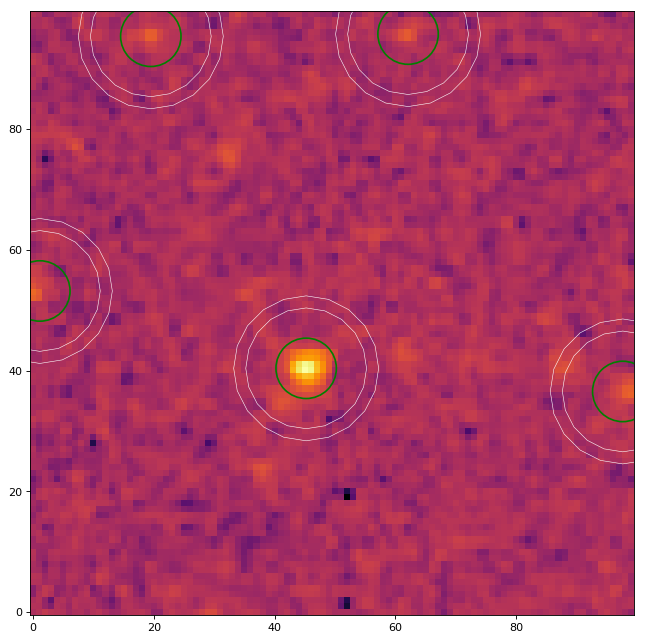

In [143]:
RR = 43   # the number of the RR Lyrae in question in my list (01-94)
index = RR-1

RA = 149.08947254547863   # RA and dec from Gaia ID
dec = 33.84335914950056
P = 0.6069206
epoch = str(input('Enter the epoch of observation as either "xc##" (include zeros) or a two digit number, not including zeros: '))
if "xc" in epoch:
    filename = '/u/m/amw58/dos/MPHYS_PROJECT/spitzer_images/'+RR+'/'+RR+'__e1_'+epoch+'/'+RR+'__e1_'+epoch+'_3p6um.fits'
else:
    filename = '/u/m/amw58/dos/MPHYS_PROJECT/spitzer_images/'+RR+'/'+RR+'__e'+epoch+'/'+RR+'__e'+epoch+'_3p6um.fits'

RR43 = fits.open(filename)
image_data = RR43[0].data
image_header = RR43[0].header

#the whole of the next section is a bit rough. for some reason it only finds the star accurate to about +-10px
#no idea why after much trigonometry

th = image_header['CROTA2']*np.pi/180   # angle of Y axis, west of north, in radians
d_RA = RA - image_header['CRVAL1']   # differences between known RA and dec of star and of center pixel
d_dec = dec - image_header['CRVAL2']
dX = -(d_RA*np.cos(th) + d_dec*np.sin(th))*6000   # calculated X and Y distances from center to star
dY = -(d_RA*np.sin(th) - d_dec*np.cos(th))*6000   
Xstar = int(np.floor(dX + image_header['CRPIX1']))   # calculated X and Y positions of star, rounded
Ystar = int(np.floor(dY + image_header['CRPIX2']))
region = image_data[Ystar-50:Ystar+50,Xstar-50:Xstar+50]   # defines the region of interest based on guessed star position

bkg_sigma = mad_std(region,ignore_nan=True)   # the stdev of background noise, to limit detection to real stars
detection_w = 5.   # the width threshold of stars which can be detected
aperture_w = 10.   # the aperture width to be used in aperture photometry

daofind = DAOStarFinder(fwhm=detection_w,threshold=10.*bkg_sigma)   # defines a star finding command
sources = daofind(region)   # applies this command to the region of interest, finding the stars
    
#the aperture photometry bit. Defines an aperture with a width of aperture_w, and an annulus around the 
#star to pick out background noise. 
    
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=aperture_w/2)
annuli = CircularAnnulus(positions,r_in=10.,r_out=12.)
totals = [apertures,annuli]
phot_table = aperture_photometry(region, totals)

    
#calculates the mean background from the annulus, then corrects the aperture brightness for this

bkg_mean = (phot_table['aperture_sum_1'])/annuli.area()
bkg_sum = bkg_mean*apertures.area()
final_sum = phot_table['aperture_sum_0']-bkg_sum
phot_table['final_sum']=final_sum
RRflux = np.max(final_sum)   # picks out the brightest star in this (small!) region, and defines that as the RRL's brightness
JD = Time(image_header['DATE_OBS'], format='isot',scale='utc').jd   # picks out the Julian Date from the header
MJD = JD - 2400000.5
phase = MJD/P - np.floor(MJD/P)
phases.append(phase)
fluxes.append(RRflux)

#plots it so I know what's going on
    
plt.figure(figsize=(10,10),dpi=80)
plt.imshow(region,cmap='inferno',origin='left',aspect='equal',norm=LogNorm())
apertures.plot(color='green',lw=1.5,alpha=1)
annuli.plot(color='white',lw=.5,alpha=1)

In [104]:
ndata = len(LC)
phases = []
fluxes = []
for i in range (ndata):
    phases.append(LC[i][0])
    fluxes.append(LC[i][1])

In [146]:
tosort = np.array([phases],[fluxes])

[0.24024464265676215, 0.33301960678363685, 0.41186992039729375, 0.47093341530126054, 0.5726637471525464, 0.663657806449919, 0.7413335310557159, 0.8222662305925041, 0.8909103264304576, 0.9721252643648768, 0.06866115014418028, 0.14739698586345185, 0.6965000193595188, 0.7007640506635653, 0.705020567504107, 0.8655778672109591, 0.8698419936554274, 0.8951745104131987, 0.8994307985994965, 0.9473726707365131, 0.9516291116160573, 0.9558852670597844, 0.020181500076432712, 0.0244456073269248, 0.028701972245471552, 0.0856600068800617, 0.08992405659228098, 0.09418816385732498]
[16.668942527761356, 16.418283869777795, 15.925337178957253, 15.024594459927219, 16.333179212807593, 17.248744053857195, 18.16015471370384, 18.247262804913184, 19.124111293000894, 19.12002607899032, 18.555084054619094, 17.693602756324736, 17.4854326085864, 17.77089544713874, 18.04324967774497, 18.592043160678642, 19.30034394310841, 19.159679367273156, 18.8803289466552, 19.337321347414104, 20.21198730339564, 18.73572179579056,

In [1]:
run automaticphotometry.py

Enter the epoch of observation as either "xc##" (include zeros) or a two digit number, not including zeros: 5
final_sum
---------
16.333179


<Figure size 800x800 with 1 Axes>